In [666]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


1. Первичный анализ данных:
    * Импортировать данные из файла ds_salaries.csv.
    * Очистить данные от дубликатов и пропущенных значений.
    

In [667]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Data Science Job Salaries Dataset contains 11 columns, each are:

    work_year: The year the salary was paid.
    experience_level: The experience level in the job during the year
    employment_type: The type of employment for the role
    job_title: The role worked in during the year.
    salary: The total gross salary amount paid.
    salary_currency: The currency of the salary paid as an ISO 4217 currency code.
    salaryinusd: The salary in USD
    employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
    remote_ratio: The overall amount of work done remotely
    company_location: The country of the employer's main office or contracting branch
    company_size: The median number of people that worked for the company during the year


In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [669]:
# проверяем на отсутствующие значения
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [670]:
# проверяем на дубликаты
df.duplicated().sum()

np.int64(1171)

дубликатов почти треть датасета

In [671]:
# убираем дубликаты
df.drop_duplicates(inplace=True)

In [672]:
# анализируем полученные результаты
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,2584.000000,2584,2584,2584,2.584000e+03,2584,2584.000000,2584,2584.000000,2584,2584
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,1554,2547,598,NaN,2107,NaN,1893,NaN,1929,2028
mean,2022.301084,NaN,NaN,NaN,2.103653e+05,NaN,133409.280186,NaN,50.483746,NaN,NaN
std,0.749179,NaN,NaN,NaN,8.080375e+05,NaN,67136.837329,NaN,48.163707,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,9.000000e+04,NaN,84975.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.346300e+05,NaN,130000.000000,NaN,50.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.825625e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


* Исследовать типы данных, описательную статистику и корреляции между признаками.
    * Визуализировать данные с помощью Matplotlib и Seaborn.

*распределение по годам*

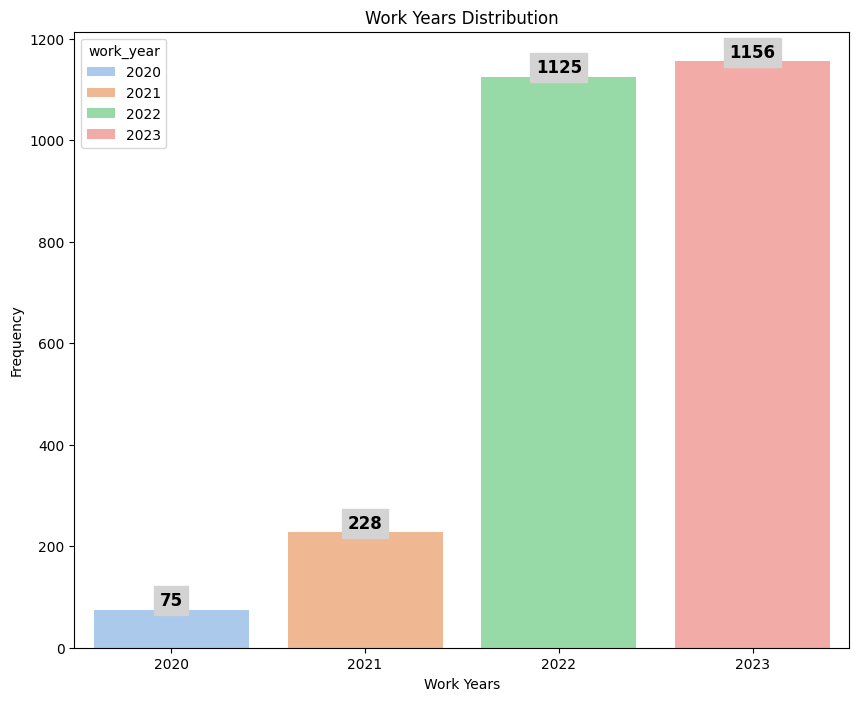

In [673]:
plt.figure(figsize=[10,8])
graph = sns.countplot(data=df , x='work_year', hue='work_year', palette="pastel")
for container in graph.containers:
    graph.bar_label(container,labels=[f'{int(label.get_height())}' for label in container], 
                    fontsize=12, color='black', weight='bold', backgroundcolor='#d3d3d3')
plt.title('Work Years Distribution')
plt.xlabel('Work Years')
plt.ylabel('Frequency')
plt.show()

*видим, что большая часть данных за 22-23 годы*

*распределение по опыту*

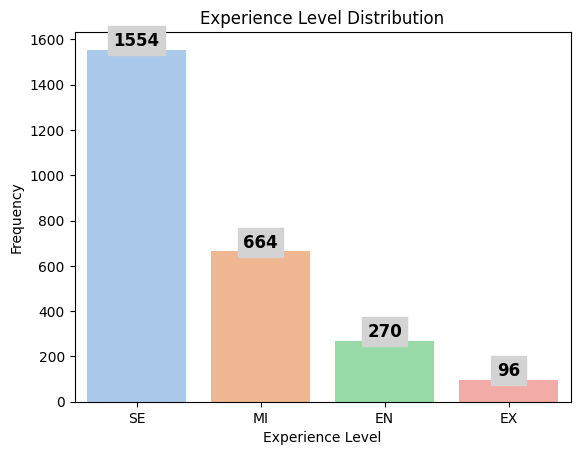

In [674]:
graph = sns.countplot(data=df , x='experience_level', hue='experience_level', palette="pastel")
for container in graph.containers:
    graph.bar_label(container,labels=[f'{int(label.get_height())}' for label in container], 
                    fontsize=12, color='black', weight='bold', backgroundcolor='#d3d3d3')
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.show()

*здесь больше всего сеньоров(SE)*

*распределение по типу работы*

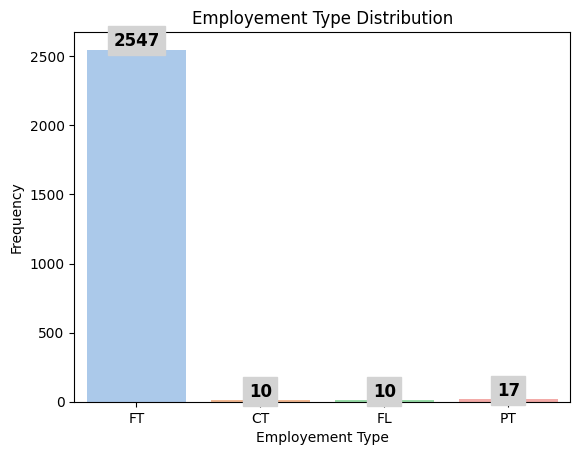

In [675]:
graph = sns.countplot(data=df , x='employment_type', hue='employment_type', palette="pastel")
for container in graph.containers:
    graph.bar_label(container,labels=[f'{int(label.get_height())}' for label in container], 
                    fontsize=12, color='black', weight='bold', backgroundcolor='#d3d3d3')
plt.title('Employement Type Distribution')
plt.xlabel('Employement Type')
plt.ylabel('Frequency')
plt.show()


*здесь перекос в сторону полного рабочего дня (FT)*

*проверим распределение по специальностям*

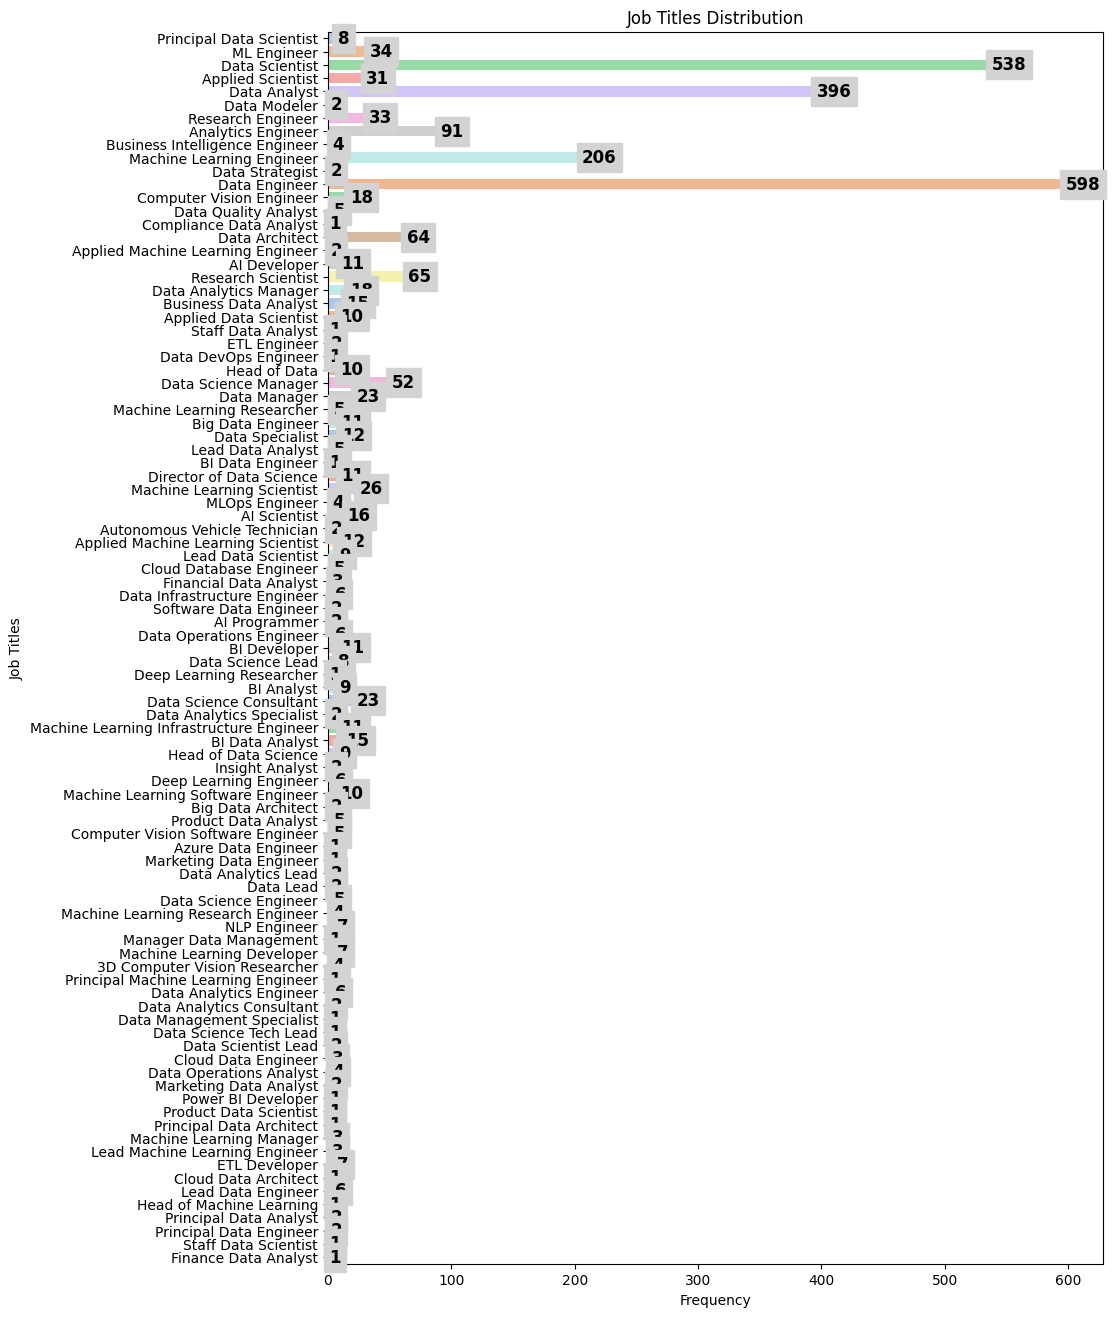

In [676]:


plt.figure(figsize=[10,16])
graph = sns.countplot(data=df , y='job_title', hue='job_title', palette="pastel")
for container in graph.containers:
    graph.bar_label(container,labels=[f'{int(label.get_width())}' for label in container], 
                    fontsize=12, color='black', weight='bold', backgroundcolor='#d3d3d3')
plt.title('Job Titles Distribution')
plt.ylabel('Job Titles')
plt.xlabel('Frequency')
plt.show()



In [677]:
df['job_title'].unique().size

93

*количество специальностей избыточное - 93, при этом есть специальности с 1 измерением, поэтому необходимо специальности группировать*

*уменьшим количество специальностей и добавим 'other'*

In [678]:
import pandas as pd

job_categories = {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer'],
    'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer'],
    'Research Scientist': ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher'],
    'Manager': ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager'],
    'Engineer': ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer'],
    'AI Specialist': ['AI Developer', 'AI Scientist', 'AI Programmer'],
    'Architect': ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']
}

# Создаем новый столбец `job_category`
df['job_category'] = 'Other'  # Значение по умолчанию для тех профессий, которые не попали в список

for category, titles in job_categories.items():
    df.loc[df['job_title'].isin(titles), 'job_category'] = category

print(df[['job_title', 'job_category']].head())

                  job_title               job_category
0  Principal Data Scientist                      Other
1               ML Engineer  Machine Learning Engineer
2               ML Engineer  Machine Learning Engineer
3            Data Scientist             Data Scientist
4            Data Scientist             Data Scientist


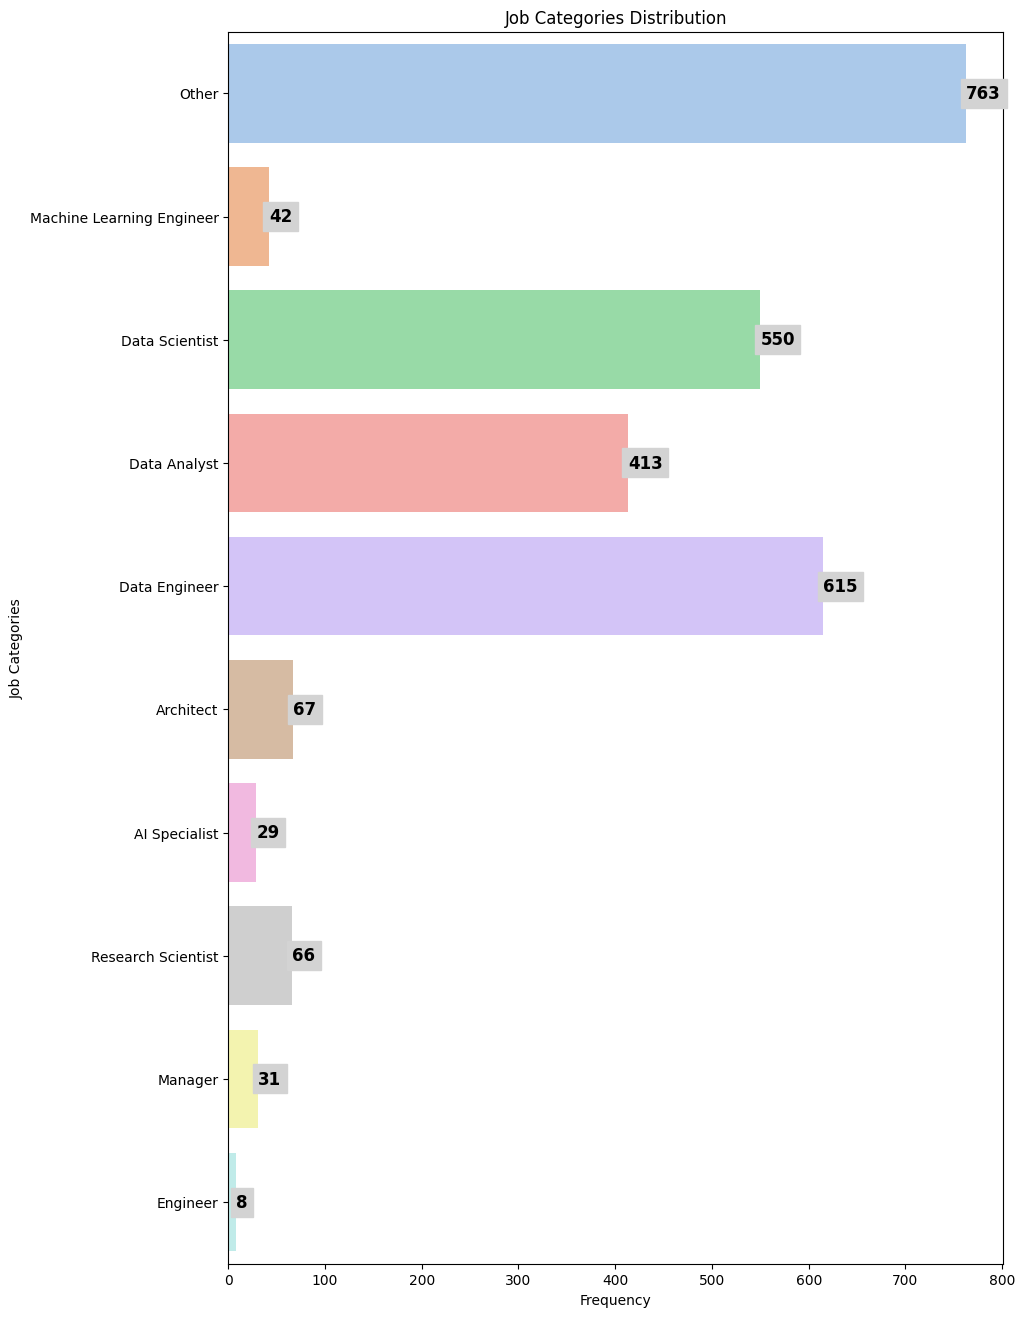

In [679]:
plt.figure(figsize=[10,16])
graph = sns.countplot(data=df , y='job_category', hue='job_category', palette="pastel")
for container in graph.containers:
    graph.bar_label(container,labels=[f'{int(label.get_width())}' for label in container], 
                    fontsize=12, color='black', weight='bold', backgroundcolor='#d3d3d3')
plt.title('Job Categories Distribution')
plt.ylabel('Job Categories')
plt.xlabel('Frequency')
plt.show()

In [680]:
df['job_category'].isna().sum()

np.int64(0)

In [681]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Other
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist


*проверим распределение по целевому признаку*

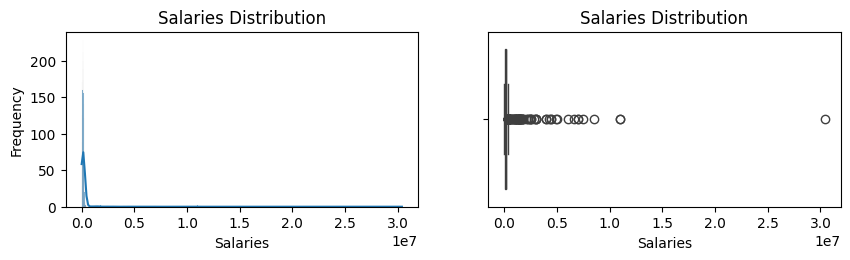

In [682]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
sns.histplot(data=df , x='salary',kde=True)
plt.title('Salaries Distribution')
plt.xlabel('Salaries')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
sns.boxplot(data=df , x='salary')
plt.title('Salaries Distribution')
plt.xlabel('Salaries')
plt.show()

*по целевой переменной есть явные выбросы, которые необходимо удалить*

In [683]:
# удаляем выбросы
drp_list = ['salary']
df_filtered = df.copy()
for col in drp_list:
    q = df[col].quantile(0.97)
    df_filtered = df_filtered[df_filtered[col] < q]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 0 to 3753
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2506 non-null   int64 
 1   experience_level    2506 non-null   object
 2   employment_type     2506 non-null   object
 3   job_title           2506 non-null   object
 4   salary              2506 non-null   int64 
 5   salary_currency     2506 non-null   object
 6   salary_in_usd       2506 non-null   int64 
 7   employee_residence  2506 non-null   object
 8   remote_ratio        2506 non-null   int64 
 9   company_location    2506 non-null   object
 10  company_size        2506 non-null   object
 11  job_category        2506 non-null   object
dtypes: int64(4), object(8)
memory usage: 254.5+ KB


*проверяем распределние после удаления выбросов*

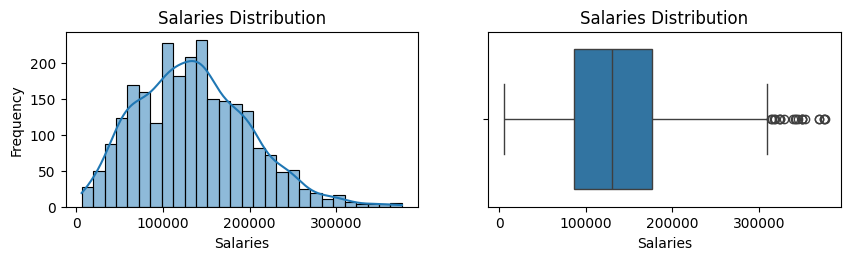

In [684]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
sns.histplot(data=df_filtered , x='salary',kde=True)
plt.title('Salaries Distribution')
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.boxplot(data=df_filtered , x='salary')
plt.title('Salaries Distribution')
plt.xlabel('Salaries')
plt.show()

In [685]:
# принимаем изменения
df = df_filtered #.copy()

In [686]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [687]:
df['job_title'].unique

<bound method Series.unique of 0       Principal Data Scientist
1                    ML Engineer
2                    ML Engineer
3                 Data Scientist
4                 Data Scientist
                  ...           
3748               Data Engineer
3749             Data Specialist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
Name: job_title, Length: 2506, dtype: object>

### *преобразуем данные в числовые *

In [688]:
# далее опыт работы, размер компании, тип работы, валюта выплат, страна размещения, страна головного офиса
from sklearn.preprocessing import LabelEncoder
selected_columns = df.loc[:, ['company_size', 'experience_level', 'employment_type', 'salary_currency', 'employee_residence', 'company_location']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
df = df.drop(columns=selected_columns)
# Вывод DataFrame
print(df.info())

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)


<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 0 to 3753
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   work_year                   2506 non-null   int64 
 1   job_title                   2506 non-null   object
 2   salary                      2506 non-null   int64 
 3   salary_in_usd               2506 non-null   int64 
 4   remote_ratio                2506 non-null   int64 
 5   job_category                2506 non-null   object
 6   company_size_encoded        2506 non-null   int64 
 7   experience_level_encoded    2506 non-null   int64 
 8   employment_type_encoded     2506 non-null   int64 
 9   salary_currency_encoded     2506 non-null   int64 
 10  employee_residence_encoded  2506 non-null   int64 
 11  company_location_encoded    2506 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 254.5+ KB
None
Кодировка для company_size: {'L': np.int64(0), 'M': np.i

In [689]:
df.isna().sum()

work_year                     0
job_title                     0
salary                        0
salary_in_usd                 0
remote_ratio                  0
job_category                  0
company_size_encoded          0
experience_level_encoded      0
employment_type_encoded       0
salary_currency_encoded       0
employee_residence_encoded    0
company_location_encoded      0
dtype: int64

In [690]:
df

,work_year,job_title,salary,salary_in_usd,remote_ratio,job_category,company_size_encoded,experience_level_encoded,employment_type_encoded,salary_currency_encoded,employee_residence_encoded,company_location_encoded
0,2023,Principal Data Scientist,80000,85847,100,Other,0,3,2,6,26,24
1,2023,ML Engineer,30000,30000,100,Machine Learning Engineer,2,2,0,11,73,67
2,2023,ML Engineer,25500,25500,100,Machine Learning Engineer,2,2,0,11,73,67
3,2023,Data Scientist,175000,175000,100,Data Scientist,1,3,2,11,11,12
4,2023,Data Scientist,120000,120000,100,Data Scientist,1,3,2,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3748,2021,Data Engineer,24000,28369,50,Data Engineer,0,2,2,6,51,47
3749,2021,Data Specialist,165000,165000,100,Other,0,3,2,11,73,67
3751,2021,Principal Data Scientist,151000,151000,100,Other,0,2,2,11,73,67
3752,2020,Data Scientist,105000,105000,100,Data Scientist,2,0,2,11,73,67


In [691]:
# название должностей
# применим tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование документов в TF-IDF векторы
tfidf_matrix = vectorizer.fit_transform(df['job_category'])
print(tfidf_matrix)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4209 stored elements and shape (2506, 12)>
  Coords	Values
  (0, 8)	1.0
  (1, 6)	0.6729234284032997
  (1, 5)	0.6729234284032997
  (1, 4)	0.3071613891945057
  (2, 6)	0.6729234284032997
  (2, 5)	0.6729234284032997
  (2, 4)	0.3071613891945057
  (3, 3)	0.5204308389382725
  (3, 10)	0.8539038247261842
  (4, 3)	0.5204308389382725
  (4, 10)	0.8539038247261842
  (5, 8)	1.0
  (6, 8)	1.0
  (7, 3)	0.5204308389382725
  (7, 10)	0.8539038247261842
  (8, 3)	0.5204308389382725
  (8, 10)	0.8539038247261842
  (9, 3)	0.5204308389382725
  (9, 10)	0.8539038247261842
  (10, 3)	0.5204308389382725
  (10, 10)	0.8539038247261842
  (11, 3)	0.4670807863161344
  (11, 1)	0.8842146453516259
  (12, 3)	0.4670807863161344
  (12, 1)	0.8842146453516259
  :	:
  (2491, 3)	0.4670807863161344
  (2491, 1)	0.8842146453516259
  (2492, 3)	0.5204308389382725
  (2492, 10)	0.8539038247261842
  (2493, 4)	0.84386241413303
  (2493, 3)	0.5365596201854688
  (2494, 8)	1.0
  (24

In [693]:

# создаем таблицу векторизации 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.307161,0.672923,0.672923,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.307161,0.672923,0.672923,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0
4,0.0,0.000000,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2501,0.0,0.000000,0.0,0.536560,0.843862,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2502,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2503,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2504,0.0,0.000000,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0


In [694]:
# индексы двух таблиц не совпадают, сбрасываем
df.reset_index(drop=True, inplace=True)
tfidf_df.reset_index(drop=True, inplace=True)
# Конкатенируем исходный DataFrame с новым DataFrame векторов TF-IDF
df = pd.concat([df, tfidf_df], axis=1).drop('job_category', axis=1)
df

,work_year,job_title,salary,salary_in_usd,remote_ratio,company_size_encoded,experience_level_encoded,employment_type_encoded,salary_currency_encoded,employee_residence_encoded,...,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist
0,2023,Principal Data Scientist,80000,85847,100,0,3,2,6,26,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
1,2023,ML Engineer,30000,30000,100,2,2,0,11,73,...,0.0,0.000000,0.307161,0.672923,0.672923,0.0,0.0,0.0,0.000000,0.0
2,2023,ML Engineer,25500,25500,100,2,2,0,11,73,...,0.0,0.000000,0.307161,0.672923,0.672923,0.0,0.0,0.0,0.000000,0.0
3,2023,Data Scientist,175000,175000,100,1,3,2,11,11,...,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0
4,2023,Data Scientist,120000,120000,100,1,3,2,11,11,...,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,2021,Data Engineer,24000,28369,50,0,2,2,6,51,...,0.0,0.536560,0.843862,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2502,2021,Data Specialist,165000,165000,100,0,3,2,11,73,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2503,2021,Principal Data Scientist,151000,151000,100,0,2,2,11,73,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2504,2020,Data Scientist,105000,105000,100,2,0,2,11,73,...,0.0,0.520431,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.853904,0.0


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   work_year                   2506 non-null   int64  
 1   job_title                   2506 non-null   object 
 2   salary                      2506 non-null   int64  
 3   salary_in_usd               2506 non-null   int64  
 4   remote_ratio                2506 non-null   int64  
 5   company_size_encoded        2506 non-null   int64  
 6   experience_level_encoded    2506 non-null   int64  
 7   employment_type_encoded     2506 non-null   int64  
 8   salary_currency_encoded     2506 non-null   int64  
 9   employee_residence_encoded  2506 non-null   int64  
 10  company_location_encoded    2506 non-null   int64  
 11  ai                          2506 non-null   float64
 12  analyst                     2506 non-null   float64
 13  architect                   2506 

In [696]:
df.isna().sum()

work_year                     0
job_title                     0
salary                        0
salary_in_usd                 0
remote_ratio                  0
company_size_encoded          0
experience_level_encoded      0
employment_type_encoded       0
salary_currency_encoded       0
employee_residence_encoded    0
company_location_encoded      0
ai                            0
analyst                       0
architect                     0
data                          0
engineer                      0
learning                      0
machine                       0
manager                       0
other                         0
research                      0
scientist                     0
specialist                    0
dtype: int64

    * Сгенерируйте дополнительные признаки

2. Построение модели линейной регрессии:
    * Разделить данные на обучающую и тестовую выборки.
    * Построить модель линейной регрессии для прогнозирования заработной платы.
    * Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
    * Проанализировать значимость признаков и мультиколлинеарность.
   

3. Построение модели дерева решений:
    * Построить модель дерева решений для прогнозирования заработной платы.
    * Оценить качество модели с помощью метрик RMSE и R-квадрат.
    * Визуализировать дерево решений
    * Подберите гиперпараметры для модели дерево решений

4. Построение ансамблевой модели:
    * Построить ансамблевую модель, используя Random Forest и Bagging.
    * Сравнить качество ансамблевой модели с отдельными моделями.
    * Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
    * Применить Principal Component Analysis (PCA) для снижения размерности данных.
    * Построить модель линейной регрессии с использованием данных, полученных после PCA.
    * Сравнить качество модели с использованием исходных данных.

6. Кластеризация:
    * Применить метод K-Means для кластеризации данных по заработной плате.
    * Определить оптимальное количество кластеров.
    * Проанализировать характеристики полученных кластеров.
    * Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
    * Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means